In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import glob

In [10]:
def fitfn(t,a,k):
    return(a *(1 - np.exp(-t * k)))

def fitfn_tanh(t,a,k):
    return(a * np.tanh(k * t))

def fitfn_x(t,a,b,k):
    return(a - b * (1 - np.exp(-t * k)))

def fitfn_x_tanh(t,a,k):
    return(a * np.log(np.cosh(k*t)))

In [37]:
g_arr = []
g_err_arr = []
RESDIR = '/home/aditya/Lab/plots/water/'
for fname in glob.glob('/home/aditya/Lab/15 Mar/*L.txt'):
    #print(fname)
    a = np.loadtxt(fname,unpack=True)
    t = a[0] - a[0][0]
    x_temp = -(a[1])
    x = (x_temp - x_temp[0])/ (x_temp[-1] - x_temp[0]) * 50
    v_temp = - a[2] 
    v = (v_temp - v_temp[0])/ (x_temp[-1] - x_temp[0]) * 50.
    popt, pcov = curve_fit(fitfn, t,v)#, p0=[250,0.15])
    popt = np.around(popt, decimals=3)
    #print(popt[0] * popt[1])
    g_arr.append(popt[0] * popt[1])
    perr = np.sqrt(np.diag(pcov))
    perr = (np.around(perr,decimals=3))
    #print(popt[0] * perr[1] + popt[1] * perr[0])
    g_err_arr.append(popt[0] * perr[1] + popt[1] * perr[0])
    
    
    
    plt.figure(figsize=(10,6))
    plt.plot(t,v, '.', label='time series')
    plt.plot(t, fitfn_tanh(t,popt[0],popt[1]),'--',
             label=r'Fitted function $a \tanh(kt)$ : $a =%s \pm %s $, $k = %s \pm %s $'%(popt[0],perr[0],
                                                                                              popt[1],perr[1]))
    l = fname.split('/')
    plt.title(l[-1])
    plt.legend()
    #plt.savefig(RESDIR+l[-1].split('.')[0]+'_tanh.png')
    plt.close()
print(np.mean(g_arr))
print(np.mean(g_err_arr))

134.7890872307692
26.676110923076923


In [54]:
v_arr = []
v_err_arr = []
RESDIR = '/home/aditya/Lab/plots/oil/'
for fname in glob.glob('/home/aditya/Downloads/oil/me*'):
    #print(fname)
    a = np.genfromtxt(fname,unpack=True,skip_header=3, skip_footer=1,invalid_raise=False)
    t = a[0] - a[0][0]
    x_temp = (a[1])
    x = (x_temp - x_temp[0])/ (x_temp[-1] - x_temp[0]) * 21.
    v_temp =  a[2] 
    v = (v_temp )/ (x_temp[-1] - x_temp[0]) * 21.
    
    vc = np.convolve(v, np.ones(20)/20.,'same')
    popt, pcov = curve_fit(fitfn_tanh, t,vc)#, p0=[250,0.15])
    popt = np.around(popt, decimals=3)
    print(popt[0] * popt[1])
    v_arr.append(popt[0])
    perr = np.sqrt(np.diag(pcov))
    perr = (np.around(perr,decimals=3))
    v_err_arr.append(perr[0])
    plt.figure(figsize=(10,6))
    #plt.plot(t,v, label='time series')
    plt.plot(t,vc, label='smoothed time series')
    plt.plot(t, fitfn_tanh(t,popt[0],popt[1]),'--',
             label=r'Fitted function $a (1 - e^{-kt})$ : $a =%s \pm %s $, $k = %s \pm %s $'%(popt[0],perr[0],
                                                                                              popt[1],perr[1]))
    #plt.xlim(0,1)
    l = fname.split('/')
    plt.title(l[-1])
    plt.legend()
    #plt.show()
    plt.savefig(RESDIR+l[-1].split('.')[0]+'_tanh.png')
    plt.close()
print(np.mean(v_arr))
print(np.mean(v_err_arr))

3.73806
10.220417999999999
3.190076
12.20912


/home/aditya/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: ConversionWarning: Some errors were detected !
    Line #160 (got 2 columns instead of 3)
    Line #161 (got 1 columns instead of 3)
    Line #162 (got 2 columns instead of 3)
  


3.887308
2.2062
0.0206


107.03904948799999


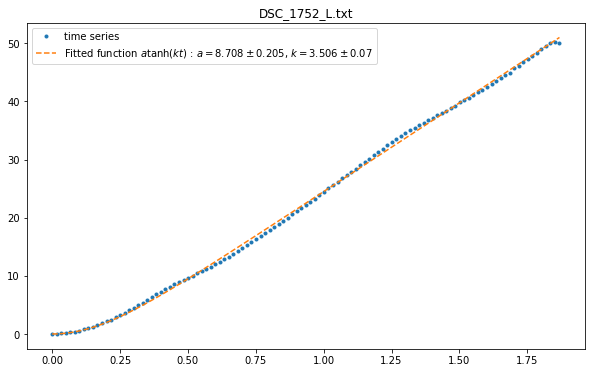

49.460304127


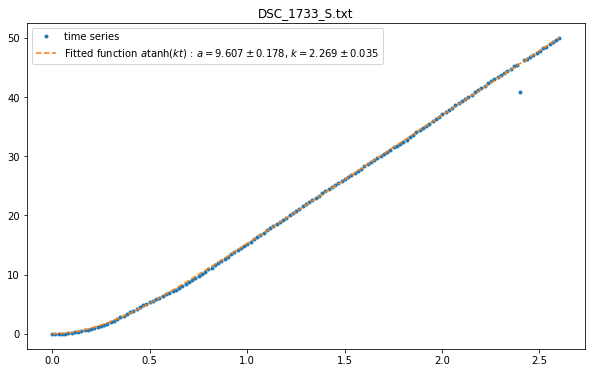

150.95692518299998


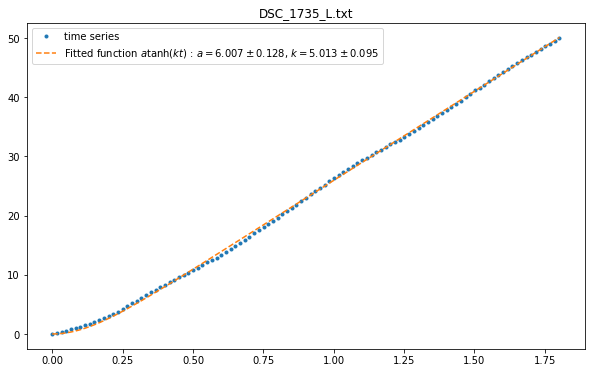

230.41451765200006


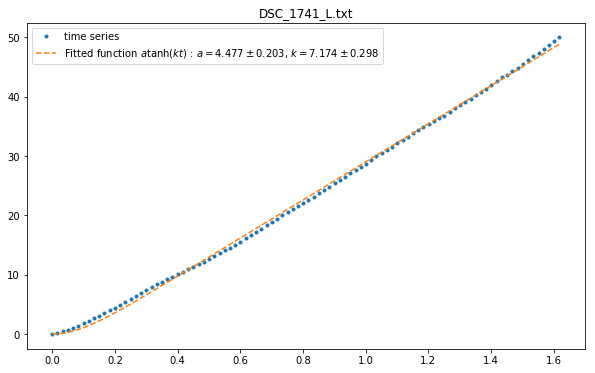

139.46555999999998


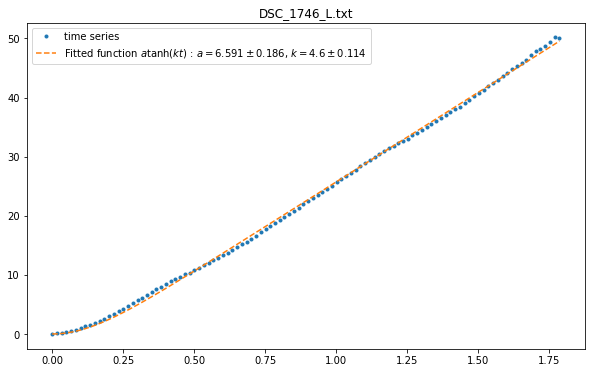

105.966626112


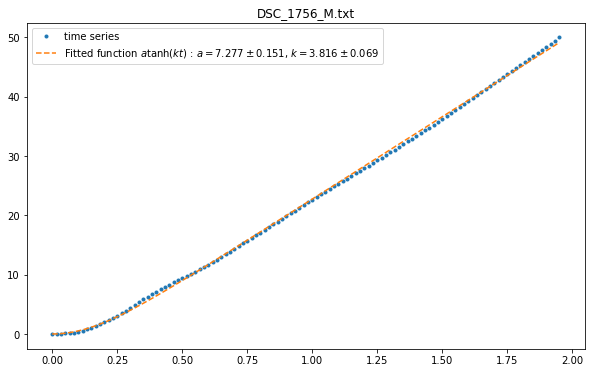

116.847078696


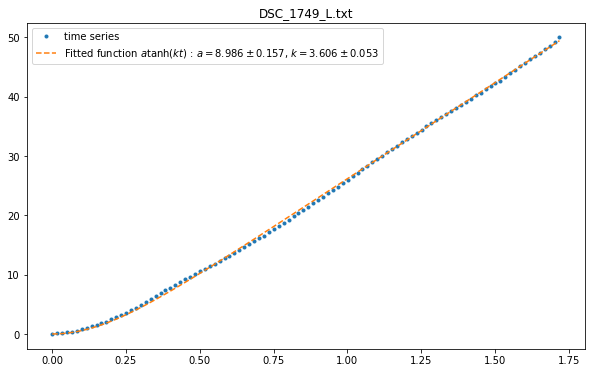

61.31002185000001


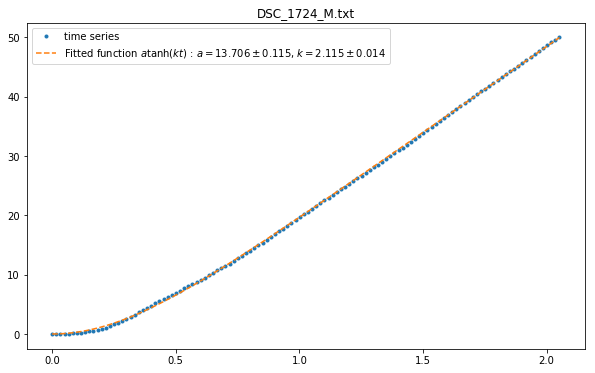

101.62959400000001


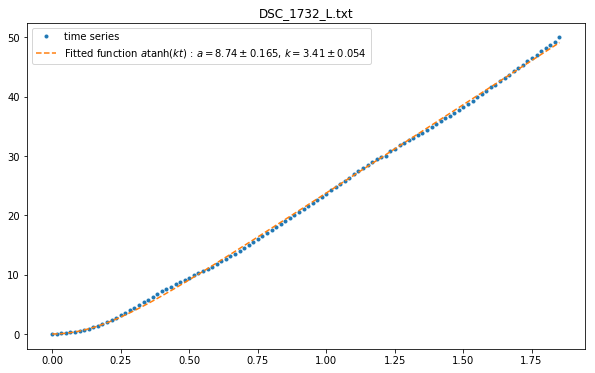

62.972234150000006


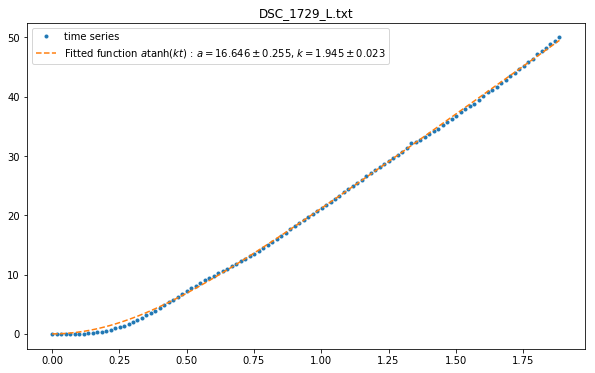

149.81743490000002


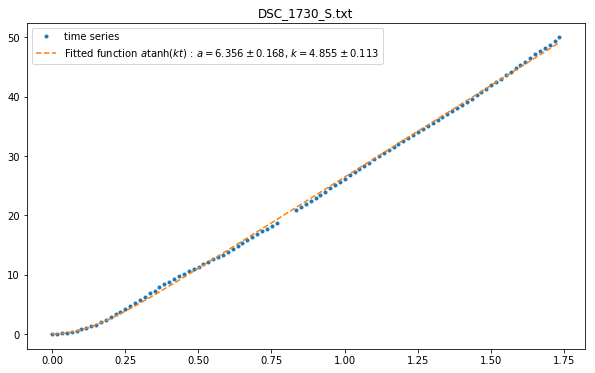

71.284652768


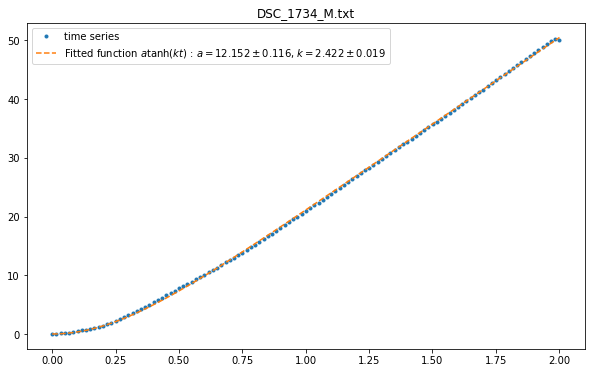

235.29535999200002


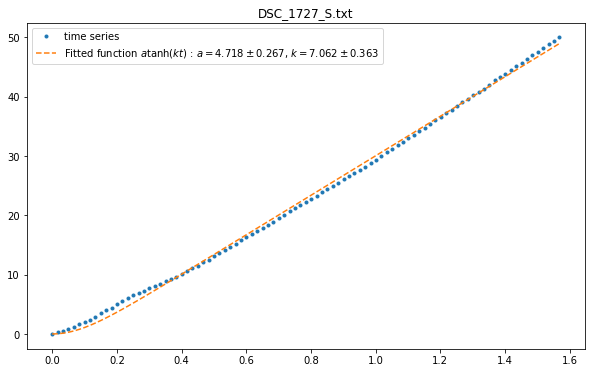

97.859480625


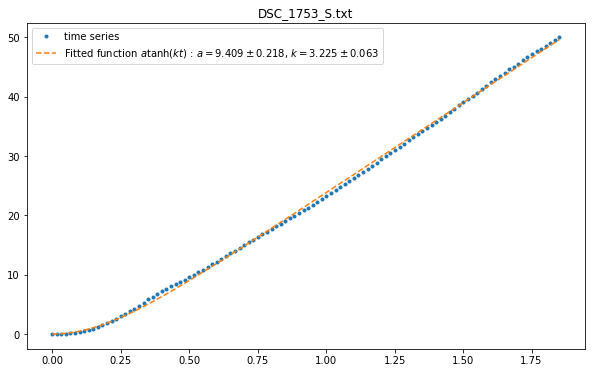

134.89152502500002


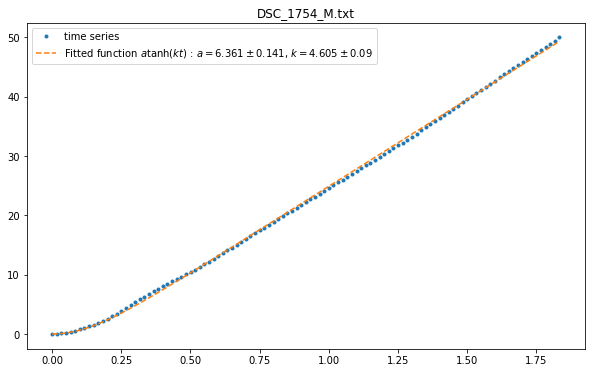

262.04034072400003


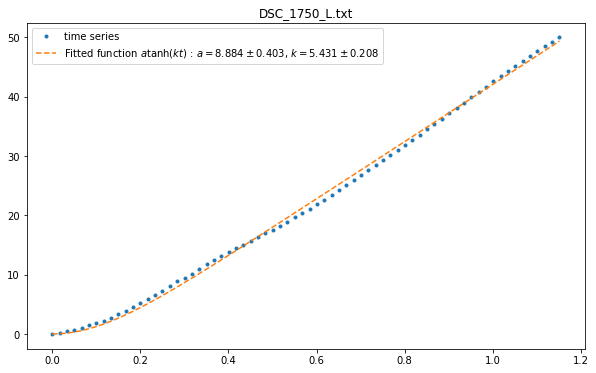

82.60390051200001


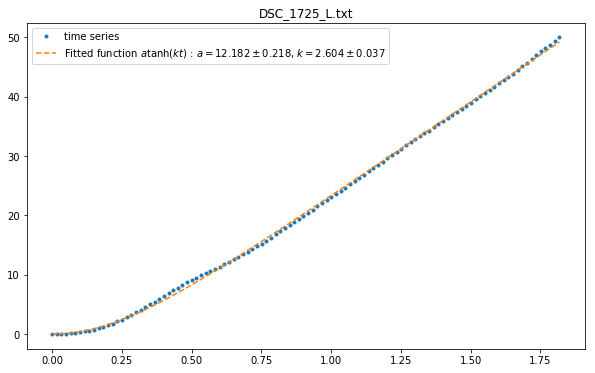

173.45844817399998


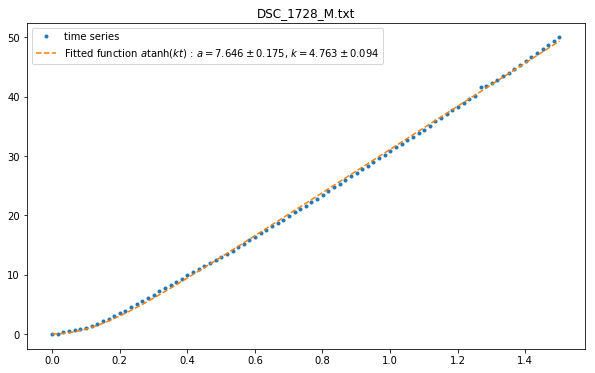

132.271386957


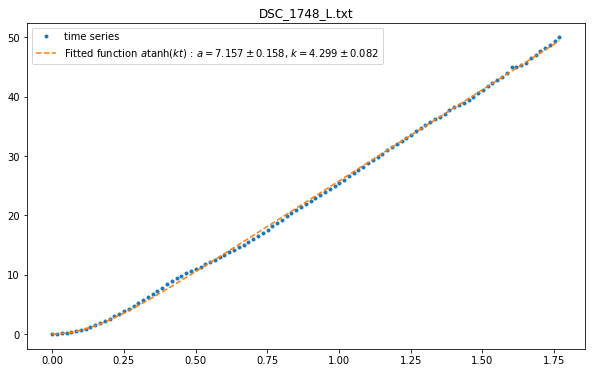

127.17308119999997


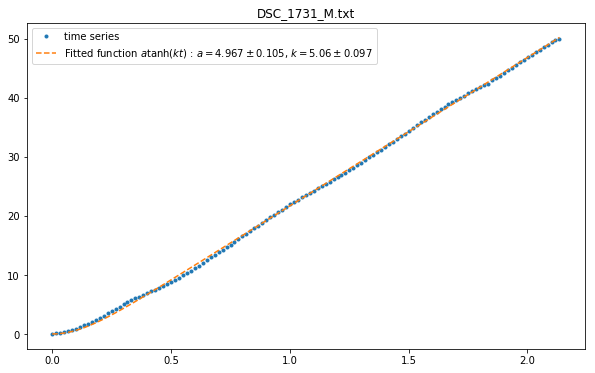

78.56792639999999


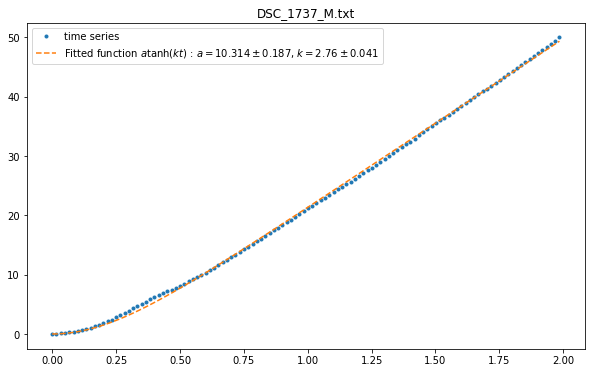

115.077472096


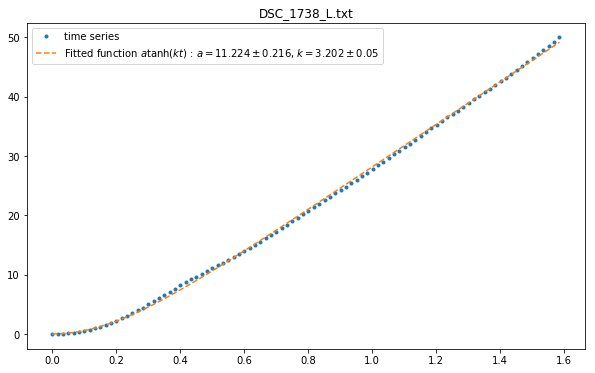

69.23211406200001


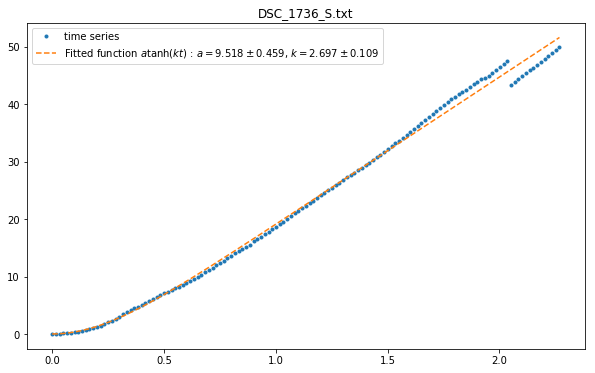

132.43459680000004


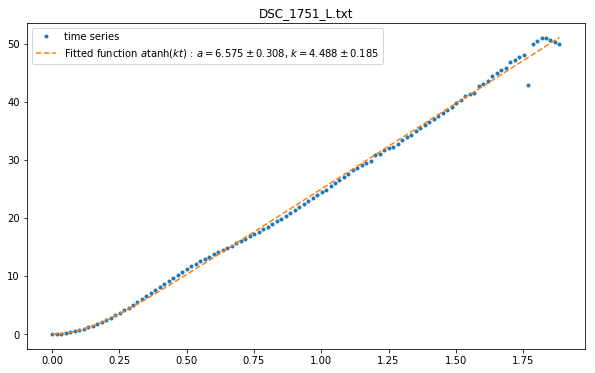

155.67130555200004


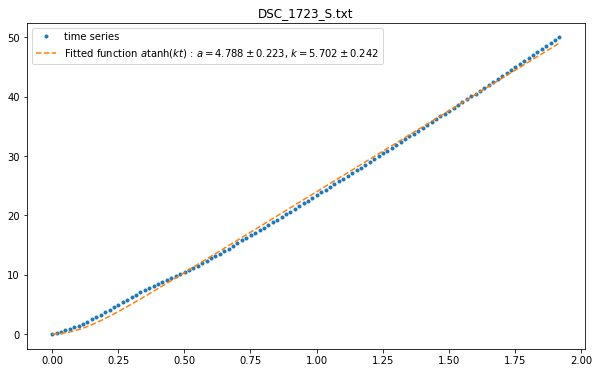

148.78247265


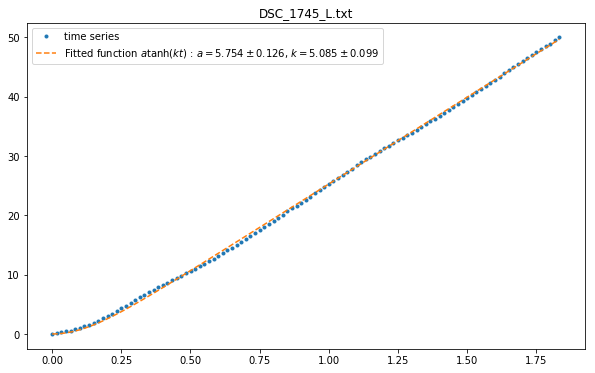

126.63551575749999
1.5346884615384615


In [22]:
g_arr = []
g_err_arr = []
RESDIR = '/home/aditya/Lab/plots/water/'
for fname in glob.glob('/home/aditya/Lab/15 Mar/*txt'):
    #print(fname)
    a = np.loadtxt(fname,unpack=True)
    t = a[0] - a[0][0]
    x_temp = -(a[1])
    x = (x_temp - x_temp[0])/ (x_temp[-1] - x_temp[0]) * 50
    popt, pcov = curve_fit(fitfn_x_tanh, t,x)#, p0=[250,0.15])
    popt = np.around(popt, decimals=3)
    print(popt[0] * popt[1]**2)
    g_arr.append(popt[0] * popt[1]**2)
    perr = np.sqrt(np.diag(pcov))
    perr = (np.around(perr,decimals=3))
    g_err_arr.append(popt[0] * perr[1] + popt[1] * perr[0])
    
    
    
    plt.figure(figsize=(10,6))
    plt.plot(t,x, '.', label='time series')
    plt.plot(t, fitfn_x_tanh(t,popt[0],popt[1]),'--',
             label=r'Fitted function $a \tanh(kt)$ : $a =%s \pm %s $, $k = %s \pm %s $'%(popt[0],perr[0],
                                                                                              popt[1],perr[1]))
    l = fname.split('/')
    plt.title(l[-1])
    plt.legend()
    plt.show()
    #plt.savefig(RESDIR+l[-1].split('.')[0]+'_tanh.png')
    plt.close()
print(np.mean(g_arr))
print(np.mean(g_err_arr))

/home/aditya/Downloads/oil/med3.txt
7.151787521999999


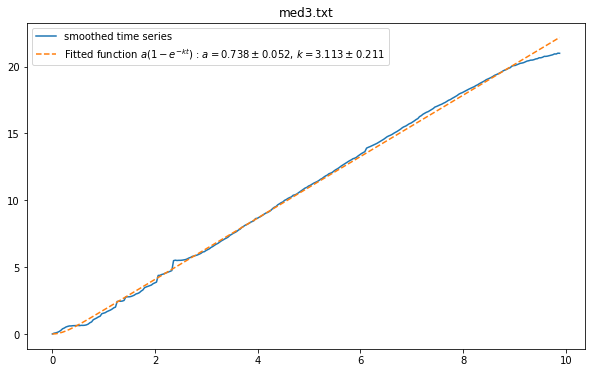

/home/aditya/Downloads/oil/med1.txt


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

In [21]:
for fname in glob.glob('/home/aditya/Downloads/oil/med*'):
    print(fname)
    a = np.genfromtxt(fname,unpack=True,skip_header=3, skip_footer=1,invalid_raise=False)
    t = a[0] - a[0][0]
    x_temp = (a[1])
    x = (x_temp - x_temp[0])/ (x_temp[-1] - x_temp[0]) * 21.
    popt, pcov = curve_fit(fitfn_x_tanh, t,x)#, p0=[250,0.15])
    popt = np.around(popt, decimals=3)
    print(popt[0] * popt[1]**2)
    perr = np.sqrt(np.diag(pcov))
    perr = (np.around(perr,decimals=3))
    plt.figure(figsize=(10,6))
    #plt.plot(t,v, label='time series')
    plt.plot(t,x, label='smoothed time series')
    plt.plot(t, fitfn_x_tanh(t,popt[0],popt[1]),'--',
             label=r'Fitted function $a (1 - e^{-kt})$ : $a =%s \pm %s $, $k = %s \pm %s $'%(popt[0],perr[0],
                                                                                              popt[1],perr[1]))
    #plt.xlim(0,1)
    l = fname.split('/')
    plt.title(l[-1])
    plt.legend()
    plt.show()
    plt.close()

In [ ]:
a = np.genfromtxt('/home/aditya/Downloads/relab/big9', skip_header=3,skip_footer=1,unpack=True)
plt.plot(a[0],-a[1])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob

In [ ]:
for fname in glob.glob('/home/aditya/Downloads/relab (1)/big*'):
    t, v = np.genfromtxt(fname, skip_header=3, skip_footer=2, unpack=True)
    plt.plot(t,v)
    plt.show()

In [ ]:
a = np.loadtxt('/home/aditya/Desktop/hello.txt', unpack=True)
plt.loglog(a[0], a[2], '.')

In [27]:
mass = 0.593
dia = 9.6


print(mass * 9.8/3/np.pi/dia*10)
print(mass /3/np.pi/dia)
print(mass * 9.8/3/np.pi/8.9*10000/dia*10)
print(mass /3/np.pi/8.9*10000/dia)



0.6423007196418339
0.006554088975937078
721.6862018447571
7.364144916783233
